# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import date

today = date.today()

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#WeatherMap API Call

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(query_url + city).json()
response

{'coord': {'lon': 141.9667, 'lat': -38.2667},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 46.51,
  'feels_like': 44.69,
  'temp_min': 46.51,
  'temp_max': 46.51,
  'pressure': 1022,
  'humidity': 96,
  'sea_level': 1022,
  'grnd_level': 1021},
 'visibility': 10000,
 'wind': {'speed': 4.18, 'deg': 98, 'gust': 5.32},
 'clouds': {'all': 13},
 'dt': 1636054279,
 'sys': {'country': 'AU', 'sunrise': 1636053614, 'sunset': 1636103470},
 'timezone': 39600,
 'id': 2171099,
 'name': 'Codrington',
 'cod': 200}

In [5]:
#DataFrame prep work
city_name=[]
cloudiness_list=[]
country_list=[]
date_list=[]
humidity_list=[]
lat_list=[]
lng_list=[]
max_temp_list=[]
wind_speed_list=[]
index_count= 0
set_count= 1

#city_num = 1
print("Beginning Data Retrieval")
print("-------------------------------")

for index, city in enumerate(cities, start =1):
    try:
        response= requests.get(query_url + city).json()
        city_name.append(response['name'])
        cloudiness_list.append(response['clouds']["all"])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
        humidity_list.append(response["main"]['humidity'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp_list.append(response["main"]['temp_max'])
        wind_speed_list.append(response['wind']['speed'])
        
        #city_found = response["name"]
        #city_num = city_num + 1
        if index_count >49:
            index_count = 1
            set_count = set_count + 1
            
        else:
            index_count = index_count + 1
            
        print(f"Processing Record {index_count} of Set {set_count} | {city}")
        
    except:
        print("City not found. Skipping... ")
        
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")


Beginning Data Retrieval
-------------------------------
City not found. Skipping... 
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | gibara
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | moron
Processing Record 6 of Set 1 | laguna
City not found. Skipping... 
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | mayumba
City not found. Skipping... 
Processing Record 10 of Set 1 | norman wells
Processing Record 11 of Set 1 | hermanus
City not found. Skipping... 
Processing Record 12 of Set 1 | araouane
Processing Record 13 of Set 1 | mwinilunga
Processing Record 14 of Set 1 | punta arenas
City not found. Skipping... 
Processing Record 15 of Set 1 | paamiut
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | albany
Processing Record 2

Processing Record 34 of Set 4 | sorland
Processing Record 35 of Set 4 | lasa
Processing Record 36 of Set 4 | bandar
Processing Record 37 of Set 4 | serro
Processing Record 38 of Set 4 | mehamn
Processing Record 39 of Set 4 | airdrie
Processing Record 40 of Set 4 | vardo
Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | port huron
City not found. Skipping... 
Processing Record 43 of Set 4 | mar del plata
Processing Record 44 of Set 4 | cayenne
Processing Record 45 of Set 4 | mantes-la-ville
Processing Record 46 of Set 4 | ogori
Processing Record 47 of Set 4 | mbuguni
Processing Record 48 of Set 4 | kalmunai
Processing Record 49 of Set 4 | abu samrah
City not found. Skipping... 
Processing Record 50 of Set 4 | mecca
Processing Record 1 of Set 5 | tura
Processing Record 2 of Set 5 | hull
Processing Record 3 of Set 5 | soure
Processing Record 4 of Set 5 | rafai
Processing Record 5 of Set 5 | aksay
City not found. Skipping... 
Processing Record 6 of Set 5 | hami
C

Processing Record 20 of Set 8 | at-bashi
Processing Record 21 of Set 8 | makat
Processing Record 22 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 23 of Set 8 | kidal
Processing Record 24 of Set 8 | carutapera
Processing Record 25 of Set 8 | college
Processing Record 26 of Set 8 | suez
Processing Record 27 of Set 8 | pedasi
Processing Record 28 of Set 8 | porbandar
Processing Record 29 of Set 8 | egvekinot
Processing Record 30 of Set 8 | udimskiy
Processing Record 31 of Set 8 | vinh
Processing Record 32 of Set 8 | micheweni
Processing Record 33 of Set 8 | kabanjahe
Processing Record 34 of Set 8 | waingapu
Processing Record 35 of Set 8 | guerrero negro
Processing Record 36 of Set 8 | north bend
Processing Record 37 of Set 8 | dvorichna
Processing Record 38 of Set 8 | koumac
Processing Record 39 of Set 8 | santa rosa
Processing Record 40 of Set 8 | kapit
Processing Record 41 of Set 8 | peniche
Processing Record 42 of Set 8 | harper
Processing Record 43 of Set 8 | faya
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df = pd.DataFrame({
    "City":city_name,
    "Lat":lat_list,
    "Lng":lng_list,
    "Max Temp":max_temp_list,
    "Humidity":humidity_list,
    "Cloudiness":cloudiness_list,
    "Wind Speed":wind_speed_list,
    "Country":country_list,
    "Date":date_list,
})
weather_df

weather_df.to_csv("../output_data/weather_df.csv", index=False, header=True)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#per table above, the minimum humidity is at 7 and the max humidity is 100. No additional steps necessary

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [10]:
date = today.strftime("%m/%d/%Y")
date

'11/04/2021'

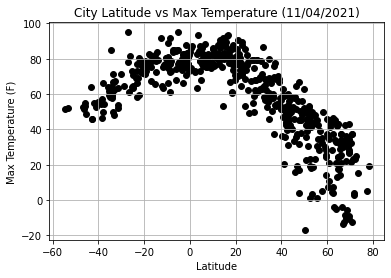

In [11]:
plt.scatter(lat_list, max_temp_list, c ="black",
            linewidths = 1,
            marker ="o", 
            edgecolor ="black", 
            s = 35)
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../Images/City Latitude vs Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

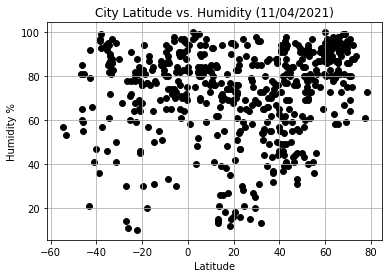

In [12]:
plt.scatter(lat_list, humidity_list, c="black",
           linewidth = 1,
           marker = "o",
           edgecolor = "black",
           s = 35)
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.savefig("../Images/City Latitude vs Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

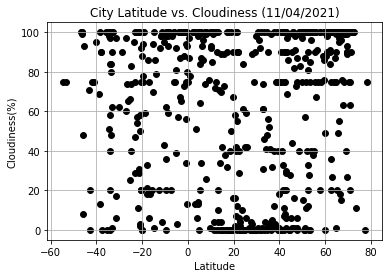

In [13]:
plt.scatter(lat_list, cloudiness_list, c="black",
           linewidth= 1,
           marker = "o",
           edgecolor = "black",
           s = 35)
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.savefig("../Images/City Latitude vs Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

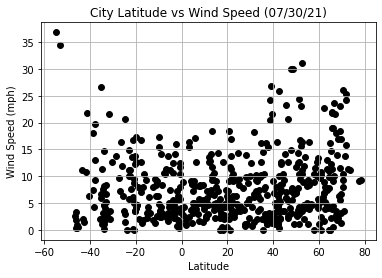

In [14]:
plt.scatter(lat_list, wind_speed_list, c="black",
           linewidth= 1,
           marker = "o",
           edgecolor = "black",
           s =35)
plt.title(f"City Latitude vs Wind Speed (07/30/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../Images/City Latitude vs Wind Speed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
north= weather_df.loc[weather_df['Lat'] >=0]
south= weather_df.loc[weather_df['Lat'] <=0]

The r-value is: 0.7364936525172402


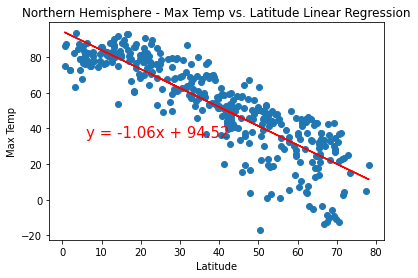

In [19]:
def regressline(x_values, y_values, ylabel, text_cord):
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    #plot scatter plot
    plt.scatter(x_values, y_values)
    #plot regression line
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_cord , fontsize =15, color="red")
    #label plot
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    #print r square value
    print(f"The r-value is: {rvalue**2}")

x_values= north["Lat"].astype('float')
y_values= north["Max Temp"].astype('float')
regressline(x_values, y_values, "Max Temp", (6,35))
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5964255178575109


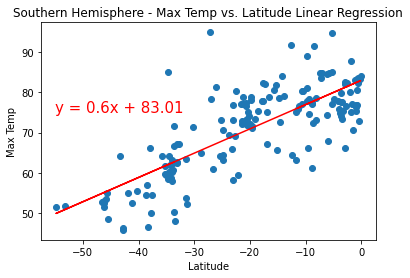

In [20]:
x_values= south["Lat"].astype('float')
y_values= south["Max Temp"].astype('float')
regressline(x_values, y_values, "Max Temp", (-55,75))
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07295737001726071


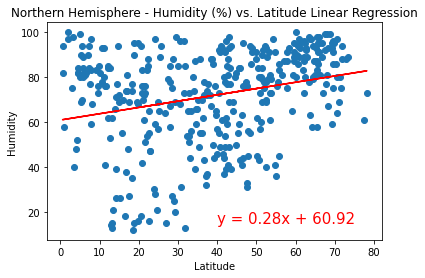

In [21]:
x_values= north["Lat"].astype('float')
y_values= north["Humidity"].astype('float')
regressline(x_values, y_values, "Humidity", (40,15))
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.026364995845362844


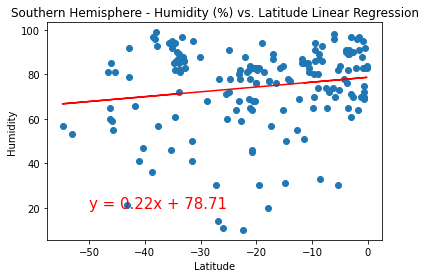

In [22]:
x_values= south["Lat"].astype('float')
y_values= south["Humidity"].astype('float')
regressline(x_values, y_values, "Humidity", (-50,20))
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04359959488182209


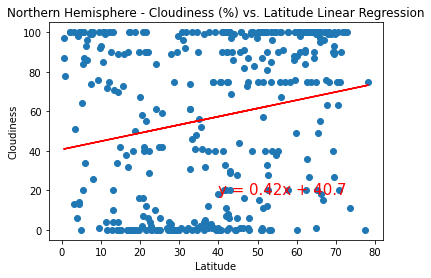

In [23]:
x_values= north["Lat"].astype('float')
y_values= north["Cloudiness"].astype('float')
regressline(x_values, y_values, "Cloudiness", (40,18))
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02054895565982372


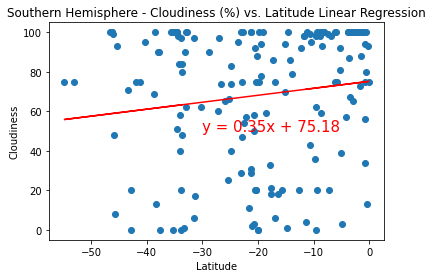

In [24]:
x_values= south["Lat"].astype('float')
y_values= south["Cloudiness"].astype('float')
regressline(x_values, y_values, "Cloudiness", (-30,50))
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04712809631498944


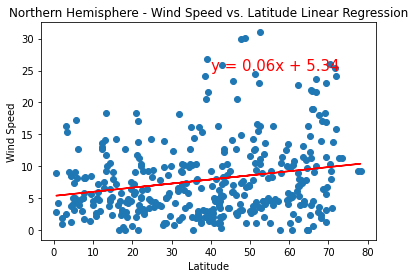

In [25]:
x_values= north["Lat"].astype('float')
y_values= north["Wind Speed"].astype('float')
regressline(x_values, y_values, "Wind Speed", (40,25))
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03541063011079337


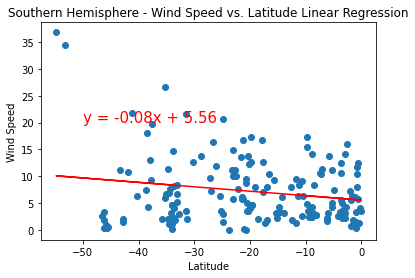

In [26]:
x_values= south["Lat"].astype('float')
y_values= south["Wind Speed"].astype('float')
regressline(x_values, y_values, "Wind Speed", (-50,20))
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.show()